In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('train.csv')

In [3]:
test=pd.read_csv('test.csv')

In [4]:
train_update=pd.read_csv('train_updates_20220929.csv')

In [5]:
df.head()

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5


In [6]:
test.head()

,seq_id,protein_sequence,pH,data_source
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes


In [7]:
df["protein_sequence"][0]

'AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVGMIKDAGDDPDVTHGAEIQAFVRFASEDRLEGGEGVGVVTKPGLGVPVGEPAINPVPRRMIWEAVREVTERPLAVTIAIPGGEELAKKTLNPRLGILGGLSVLGTTGVVKPYSTSAFRMSVVQAVGVARANGLLEIAATTGGKSERFAQRLLPHLPEMAFIEMGDFVGDVLRAARKVGVEVVRVVGMIGKISKMADGKTMTHAAGGEVNLSLLLSLLKEAGASPKALKEAEGAATARRFLEIALEEGLELFFVNLVRLAQEKLQAYIGERPFVSVALTDFDEGRCLAAWPDREVYR'

In [8]:
df.describe()

,seq_id,pH,tm
count,31390.000000,31104.000000,31390.000000
mean,15694.500000,6.892339,49.147337
std,9061.656811,1.612225,14.010089
min,0.000000,1.990000,-1.000000
25%,7847.250000,7.000000,42.100000
50%,15694.500000,7.000000,48.000000
75%,23541.750000,7.000000,53.800000
max,31389.000000,64.900000,130.000000


In [9]:
df.corr()

,seq_id,pH,tm
seq_id,1.000000,-0.040164,0.008750
pH,-0.040164,1.000000,-0.044544
tm,0.008750,-0.044544,1.000000


In [10]:
df.sort_values('pH',ascending = False, inplace = True)

In [11]:
df.head()

,seq_id,protein_sequence,pH,data_source,tm
13449,13449,MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANW...,64.9,NaN,0.1
13447,13447,MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANW...,64.9,NaN,0.2
1014,1014,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,55.6,NaN,5.5
989,989,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFANRESVLPT...,55.6,NaN,5.5
1079,1079,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,55.6,NaN,5.5


In [12]:
df.tail()

,seq_id,protein_sequence,pH,data_source,tm
28753,28753,MVLKQRANYLGFLIVFFTAFLVEAVPIKRQSNSTVDSLPPLIPSRT...,NaN,10.1128/AEM.02129-17,58.9
28754,28754,MVLKQRANYLGFLIVFFTAFLVEAVPIKRQSNSTVDSLPPLIPSRT...,NaN,10.1128/AEM.02129-17,59.4
28755,28755,MVLKQRANYLGFLIVFFTAFLVEAVPIKRQSNSTVDSLPPLIPSRT...,NaN,10.1128/AEM.02129-17,57.8
28756,28756,MVLKQRANYLGFLIVFFTAFLVEAVPIKRQSNSTVDSLPPLIPSRT...,NaN,10.1128/AEM.02129-17,59.3
29077,29077,MVRPTILLTSLLLAPFAAASPILEERQAAQSVDQLIKARGKVYFGV...,NaN,10.1016/j.ijbiomac.2016.08.056,71.3


In [13]:
df.drop(['data_source'],axis=1,inplace=True)
df

,seq_id,protein_sequence,pH,tm
13449,13449,MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANW...,64.9,0.1
13447,13447,MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANW...,64.9,0.2
1014,1014,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,55.6,5.5
989,989,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFANRESVLPT...,55.6,5.5
1079,1079,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,55.6,5.5
...,...,...,...,...
28753,28753,MVLKQRANYLGFLIVFFTAFLVEAVPIKRQSNSTVDSLPPLIPSRT...,NaN,58.9
28754,28754,MVLKQRANYLGFLIVFFTAFLVEAVPIKRQSNSTVDSLPPLIPSRT...,NaN,59.4
28755,28755,MVLKQRANYLGFLIVFFTAFLVEAVPIKRQSNSTVDSLPPLIPSRT...,NaN,57.8
28756,28756,MVLKQRANYLGFLIVFFTAFLVEAVPIKRQSNSTVDSLPPLIPSRT...,NaN,59.3


In [14]:
df.isnull().sum()

#286 rows with pH=NaN

seq_id                0
protein_sequence      0
pH                  286
tm                    0
dtype: int64

In [15]:
df['pH'] = df['pH'].fillna(df['pH'].median())

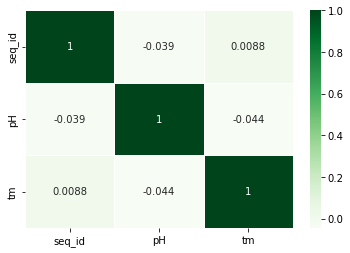

In [16]:
sns.heatmap(df.corr(),linewidths=1,cmap=plt.cm.Greens, annot=True);

In [17]:
list = []
for number in range(len(df)):
    list.append(len(df.protein_sequence[number]))
df['length'] = list

In [18]:
df

,seq_id,protein_sequence,pH,tm,length
13449,13449,MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANW...,64.9,0.1,341
13447,13447,MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANW...,64.9,0.2,286
1014,1014,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,55.6,5.5,497
989,989,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFANRESVLPT...,55.6,5.5,265
1079,1079,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,55.6,5.5,1451
...,...,...,...,...,...
28753,28753,MVLKQRANYLGFLIVFFTAFLVEAVPIKRQSNSTVDSLPPLIPSRT...,7.0,58.9,549
28754,28754,MVLKQRANYLGFLIVFFTAFLVEAVPIKRQSNSTVDSLPPLIPSRT...,7.0,59.4,469
28755,28755,MVLKQRANYLGFLIVFFTAFLVEAVPIKRQSNSTVDSLPPLIPSRT...,7.0,57.8,128
28756,28756,MVLKQRANYLGFLIVFFTAFLVEAVPIKRQSNSTVDSLPPLIPSRT...,7.0,59.3,593


In [19]:
df.drop(['seq_id'],axis=1,inplace=True)

In [20]:
#df.reset_index() 

In [21]:
#df.drop(['index'],axis=1,inplace=True)

In [22]:
df

,protein_sequence,pH,tm,length
13449,MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANW...,64.9,0.1,341
13447,MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANW...,64.9,0.2,286
1014,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,55.6,5.5,497
989,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFANRESVLPT...,55.6,5.5,265
1079,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,55.6,5.5,1451
...,...,...,...,...
28753,MVLKQRANYLGFLIVFFTAFLVEAVPIKRQSNSTVDSLPPLIPSRT...,7.0,58.9,549
28754,MVLKQRANYLGFLIVFFTAFLVEAVPIKRQSNSTVDSLPPLIPSRT...,7.0,59.4,469
28755,MVLKQRANYLGFLIVFFTAFLVEAVPIKRQSNSTVDSLPPLIPSRT...,7.0,57.8,128
28756,MVLKQRANYLGFLIVFFTAFLVEAVPIKRQSNSTVDSLPPLIPSRT...,7.0,59.3,593


In [23]:
df['pH'].value_counts()

7.00    26748
7.50      576
8.00      502
3.00      288
2.70      274
        ...  
2.98        1
3.90        1
3.21        1
3.19        1
5.31        1
Name: pH, Length: 115, dtype: int64

In [24]:
df['tm'].value_counts()

25.0     1472
20.0      561
50.0      200
45.0      178
49.7      176
         ... 
26.1        1
109.5       1
18.0        1
116.0       1
93.3        1
Name: tm, Length: 770, dtype: int64

In [25]:
#To make things easier here details of all amino acids are listed in search_amino.
search_amino=['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
for amino_acid in search_amino:
     df[amino_acid]=df['protein_sequence'].str.count(amino_acid,re.I)

In [26]:
df.drop(['protein_sequence'],axis=1,inplace=True)
df

,pH,tm,length,A,C,D,E,F,G,H,...,M,N,P,Q,R,S,T,V,W,Y
13449,64.9,0.1,341,15,8,8,3,2,14,1,...,3,9,2,7,14,7,6,13,5,6
13447,64.9,0.2,286,16,8,8,3,2,13,1,...,3,9,2,7,14,7,6,13,5,6
1014,55.6,5.5,497,7,2,7,5,3,8,2,...,0,2,6,5,4,7,13,6,0,8
989,55.6,5.5,265,7,2,7,5,3,8,2,...,0,2,6,4,5,7,13,6,0,8
1079,55.6,5.5,1451,6,2,7,4,3,8,2,...,0,2,6,5,5,7,13,6,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28753,7.0,58.9,549,27,7,20,16,14,22,6,...,5,15,24,11,14,37,33,29,4,19
28754,7.0,59.4,469,27,7,20,16,14,22,6,...,5,14,24,11,15,38,33,29,4,18
28755,7.0,57.8,128,27,7,20,16,14,22,6,...,5,15,24,11,14,38,32,29,5,18
28756,7.0,59.3,593,26,7,20,16,14,22,6,...,5,15,24,11,14,38,33,29,4,18


In [27]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
data_with_imputed_values = my_imputer.fit_transform(df)

test.describe()

,seq_id,pH
count,2413.000000,2413.0
mean,32596.000000,8.0
std,696.717422,0.0
min,31390.000000,8.0
25%,31993.000000,8.0
50%,32596.000000,8.0
75%,33199.000000,8.0
max,33802.000000,8.0


In [28]:
search_amino=['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
for amino in search_amino:
    test[amino]=test['protein_sequence'].str.count(amino,re.I)

In [29]:
test.drop(['data_source','protein_sequence'],axis=1,inplace=True)
test.head()

,seq_id,pH,A,C,D,E,F,G,H,I,...,M,N,P,Q,R,S,T,V,W,Y
0,31390,8,22,4,15,8,10,19,0,6,...,0,19,17,13,3,18,8,13,6,6
1,31391,8,22,4,15,7,10,19,0,6,...,0,19,17,13,3,18,8,13,6,6
2,31392,8,22,4,15,7,10,19,0,6,...,0,19,17,13,3,18,8,13,6,6
3,31393,8,22,5,15,7,10,19,0,6,...,0,19,17,13,3,18,8,13,6,6
4,31394,8,22,4,15,7,11,19,0,6,...,0,19,17,13,3,18,8,13,6,6


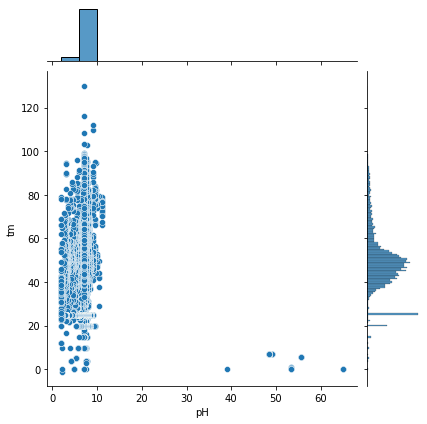

In [30]:
sns.jointplot(data=df, x="pH", y="tm")
#Data Visualization of training data

## Random Forest Regressor

In [31]:
df.head()

,pH,tm,length,A,C,D,E,F,G,H,...,M,N,P,Q,R,S,T,V,W,Y
13449,64.9,0.1,341,15,8,8,3,2,14,1,...,3,9,2,7,14,7,6,13,5,6
13447,64.9,0.2,286,16,8,8,3,2,13,1,...,3,9,2,7,14,7,6,13,5,6
1014,55.6,5.5,497,7,2,7,5,3,8,2,...,0,2,6,5,4,7,13,6,0,8
989,55.6,5.5,265,7,2,7,5,3,8,2,...,0,2,6,4,5,7,13,6,0,8
1079,55.6,5.5,1451,6,2,7,4,3,8,2,...,0,2,6,5,5,7,13,6,0,8


We can see that different columns have  different distributions of data.
Let's convert all the columns into same distribution using normalization(mean=0,var=1), So that our model can understand the data well which helps in better prediction

In [32]:
normalized_df=(df-df.mean())/df.std()

In [33]:
x=normalized_df.drop(['tm'],axis=1)
y=normalized_df['tm']

In [34]:
#Here we can see that all the columns are normalized and brought down to same distribution
x.head()

,pH,length,A,C,D,E,F,G,H,I,...,M,N,P,Q,R,S,T,V,W,Y
13449,36.143584,-0.166481,-0.440846,0.109248,-0.478606,-0.513186,-0.731998,-0.392670,-0.693174,-0.485650,...,-0.653549,-0.391395,-0.456406,-0.432508,-0.293288,-0.49966,-0.413680,-0.306206,-0.002882,-0.391458
13447,36.143584,-0.252321,-0.418001,0.109248,-0.478606,-0.513186,-0.731998,-0.417311,-0.693174,-0.485650,...,-0.653549,-0.391395,-0.456406,-0.432508,-0.293288,-0.49966,-0.413680,-0.306206,-0.002882,-0.391458
1014,30.348815,0.076991,-0.623602,-0.360839,-0.506959,-0.478512,-0.681799,-0.540516,-0.616668,-0.512983,...,-0.921909,-0.669628,-0.367492,-0.502057,-0.593861,-0.49966,-0.254368,-0.438132,-0.565390,-0.283715
989,30.348815,-0.285096,-0.623602,-0.360839,-0.506959,-0.478512,-0.681799,-0.540516,-0.616668,-0.512983,...,-0.921909,-0.669628,-0.367492,-0.536831,-0.563804,-0.49966,-0.254368,-0.438132,-0.565390,-0.283715
1079,30.348815,1.565920,-0.646447,-0.360839,-0.506959,-0.495849,-0.681799,-0.540516,-0.616668,-0.512983,...,-0.921909,-0.669628,-0.367492,-0.502057,-0.563804,-0.49966,-0.254368,-0.438132,-0.565390,-0.283715


In [35]:
# Time to prepare the weapons for our model!
# Firstly we should divide the dataset into tran and test. And 80:20 split is the standard ratio used for this split. 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
x_train.shape,y_train.shape

((25112, 22), (25112,))

In [36]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(x_train, y_train);

In [37]:
# predicting the y values for x_test
y_pred = rf.predict(x_test)

In [38]:
def evaluvation_metrics(y_test,y_pred):
  from sklearn.metrics import mean_absolute_error
  from sklearn.metrics import mean_squared_error
  from sklearn.metrics import r2_score
  import numpy as np 
  print("*"*20)
  print("*"*8," Evaluation Scores ","*"*8)
  print("\nMean Absolute Error : ",mean_absolute_error(y_test,y_pred))
  print("\nMean Squared Error : ",mean_squared_error(y_test,y_pred))
  print("\nRoot Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,y_pred)))
  print("\nR Squared Score : ",r2_score(y_test,y_pred))
evaluvation_metrics(y_test,y_pred)

********************
********  Evaluation Scores  ********

Mean Absolute Error :  0.43792191469668373

Mean Squared Error :  0.39087552044163115

Root Mean Squared Error :  0.6252003842302332

R Squared Score :  0.5920960291883195


In [41]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [42]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,
               'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf,'bootstrap': bootstrap}

In [43]:
## Importing Random Forest Classifier from the sklearn.ensemble.
rf_improved = RandomForestRegressor()

In [44]:
## Using Randomized SearchCV to find the best paramaters for Random Forest. 
RF_IMPROVED = RandomizedSearchCV(estimator = rf_improved,param_distributions = random_grid,
                                 n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [46]:
RF_IMPROVED.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [47]:
# print the best parameters 
print ('Random grid: ', random_grid, '\n')
print ('Best Parameters: ', RF_IMPROVED.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}  



In [48]:
# Using the best parameters from Randomized SearchCV
rf_improved = RandomForestRegressor(n_estimators = 100, min_samples_split = 6, min_samples_leaf= 3, max_features = 'sqrt', max_depth= 40, bootstrap=False) 
rf_improved.fit(x_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=40, max_features='sqrt',
                      min_samples_leaf=3, min_samples_split=6)

In [54]:
evaluvation_metrics(y_test,rf_pred)

********************
********  Evaluvation Scores  ********

Mean Absolute Error :  0.44102224896864867

Mean Squared Error :  0.3756361788979789

Root Mean Squared Error :  0.6128916534739064

R Squared Score :  0.6079992710213916
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.4s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20; total time=   6.4s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   3.9s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   1.0s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   1.0s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=3, min_sam

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.4s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=5; total time=   0.3s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=5; total time=   1.4s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=5; total time=   1.6s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=5; total time=   1.0s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   4.0s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   2.6s
[CV] END bootstrap=False, max_depth=40, max_featur

[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=5; total time=   0.3s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20; total time=   6.4s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   2.8s
[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   3.9s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=5; total time=   1.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=5; total time=   0.9s
[CV] END bootstrap=False, max_depth=80, max_featur

Here we can see that MAE,MSE and RMSE are close to 0, which means that our model was able to predict very well with close to 0 error.
R Squared Score describes the percentage of variance between predicted vs actual data. If R Squared is close to 1, then the model prediction is good.

# Thank you


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
rf = RandomForestRegressor()
from pprint import pprint
lets find the parameters used by Randomforest models
pprint(rf.get_params())


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)


In [ ]:
#rfc.fit(X_train, y_train)

In [ ]:
#y_pred_test = rfc.predict(X_test)
#y_pred_train = rfc.predict(X_train)

In [ ]:
#x=df.drop(['tm'],axis=1)
#y=df['tm']

In [ ]:
#from sklearn.model_selection import train_test_split
#x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.20,random_state=42)
#x_train.shape,y_train.shape

In [ ]:
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import RandomizedSearchCV
#from pprint import pprint
#rf = RandomForestRegressor()

In [ ]:
#from pprint import pprint
#lets find the parameters used by Randomforest models
#pprint(rf.get_params())


In [ ]:
#RF = RandomForestRegressor(n_estimators = 200,
 #                          max_depth = 29,
  #                         min_samples_split = 17,
   #                        min_samples_leaf = 2,
    #                       max_features = 3,
     #                      random_state = 0)
#score = cv_score(RF)
#print("Random Forest score: {:.4f} ({:.4f})".format(score.mean(), score.std()))